In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active




In [3]:
# Functions
def boots_by_subj(data, col_int, col_subj, n_iterations, alpha, stat):
    #### you give a 2 column df, one column qith the value and the other column with subject index:
    list_subjects = data[col_subj].unique()
    sample=[]
    for n in range(n_iterations):
        resampled=[]
        new_sample = list(np.random.randint(0, len(list_subjects), len(list_subjects)))
        for res_s in new_sample:
            resampled = resampled + list(data.loc[data[col_subj]==list_subjects[res_s], col_int].values) 
        #
        sample.append(stat(resampled))
    #
    stats_sorted = np.sort(sample)
    new_mean=np.mean(sample)
    return (new_mean, stats_sorted[int((alpha/2.0)*n_iterations)],
            stats_sorted[int((1-alpha/2.0)*n_iterations)])


###
###


def line_significance(timepoints, ci_inf, ci_sup, y_min_shad, y_max_shad, color_sh):
    for idx_t in range(  len(timepoints)-1 ):
        half = timepoints[1]/2 
        #if ci_inf[idx_t]<= 0 <= ci_sup[idx_t]:    #### inferior and superior
        #    plt.fill_between(  [timepoints[idx_t], timepoints[idx_t+1] ], [y_min_shad, y_min_shad], [y_max_shad, y_max_shad], color='w', alpha=0.3)
        
        if ci_inf[idx_t]<= 0 : ### just superior
            plt.fill_between(  [timepoints[idx_t] - half, timepoints[idx_t+1] - half -0.25 ], [y_min_shad-0.05, y_min_shad-0.05], [y_max_shad, y_max_shad], color='w', step= 'mid', alpha=0.3)
        
        else:
            plt.fill_between(  [timepoints[idx_t] - half,  timepoints[idx_t+1] - half -0.25 ], [y_min_shad-0.05, y_min_shad-0.05], [y_max_shad, y_max_shad], color=color_sh, step= 'mid',alpha=0.3)


            
###


# from mlxtend.evaluate import permutation_test

# p_value = permutation_test(value, shuffle, method='approximate', num_rounds=10000, seed=0)
# print(p_value)





#         ## Plot the significance line
#         for index_color, brain_reg in enumerate(['visual', 'ips', 'frontinf']):
#             all_timepoints = list( data_cond.loc[data_cond['brain_reg']==brain_reg].time )
#             conf_inf = list( data_cond.loc[data_cond['brain_reg']==brain_reg].inf )
#             conf_sup = list( data_cond.loc[data_cond['brain_reg']==brain_reg].sup )
#             color_sign = pal[index_color]
#             y_min_shad = -7 - index_color
#             y_max_shad = -8 - index_color
#             line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)




###

def plot_decoding(df_plot):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
    ##
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [0, 27]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [0, 35]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
        #ax.lines[0].set_linestyle("--")
        data_cond =  df_plot.loc[ (df_plot['condition']==condition)]
        sns.lineplot( ax=ax, x="time", y="old_mean", hue='brain_reg', hue_order =  ['visual', 'ips', 'frontinf'], ci=None, palette=pal, data=data_cond) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['brain_reg']=='visual', 'inf']) , list(data_cond.loc[data_cond['brain_reg']=='visual', 'sup']) , color=pal[0], alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['brain_reg']=='ips', 'inf']) , list(data_cond.loc[data_cond['brain_reg']=='ips', 'sup']) , color=pal[1], alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['brain_reg']=='frontinf', 'inf']) , list(data_cond.loc[data_cond['brain_reg']=='frontinf', 'sup']) , color=pal[2], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=95, palette=pal, data=dfsn.loc[ (dfsn['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'

        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        for index_color, brain_reg in enumerate(['visual', 'ips', 'frontinf']):
            all_timepoints = list( data_cond.loc[data_cond['brain_reg']==brain_reg].time )
            conf_inf = list( data_cond.loc[data_cond['brain_reg']==brain_reg].inf )
            conf_sup = list( data_cond.loc[data_cond['brain_reg']==brain_reg].sup )
            color_sign = pal[index_color]
            y_min_shad = -7 - index_color
            y_max_shad = -8 - index_color
            line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( '', fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    

    
#####



Target plot without dividing by std!

In [33]:
path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM.xlsx'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)
df_t = pd.concat([Df, Df_shuff]) #concatenate the files


In [34]:
Df.size

11520

In [35]:
Df_shuff.size

1152000

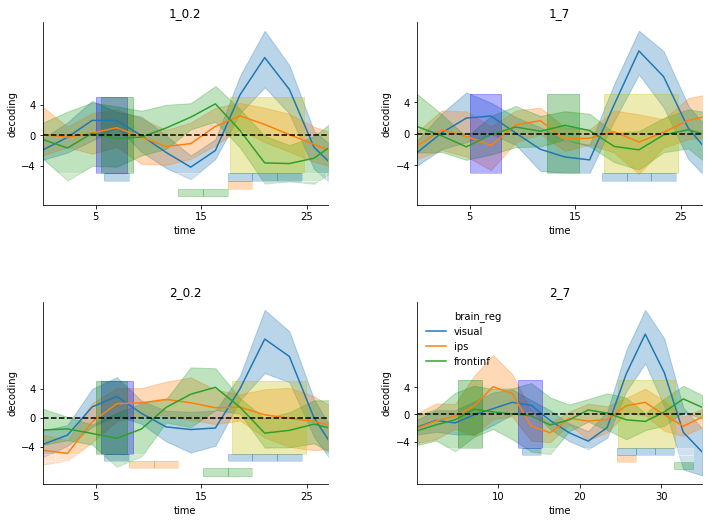

In [9]:
##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: #['visual', 'ips', 'pfc']: ['front_sup', 'front_mid', 'front_inf']
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_t.subject.unique():
            #decode_timepoint = []
            for times in df_t.times.unique():    
                #values = df_t.loc[(df_t['label']=='shuffle') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_t.loc[(df_t['label']=='signal') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = values_boot.iloc[n_boot]
                    subj_decoding.append([prediction, times, subject, brain_region, condition])

                    
                    
                    
#
dft = pd.DataFrame(subj_decoding) 
dft.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dft.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dft.loc[(dft['condition']==condition) & (dft['times']==time) & (dft['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_t = pd.DataFrame(df_plot) 
df_plot_t.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_t)

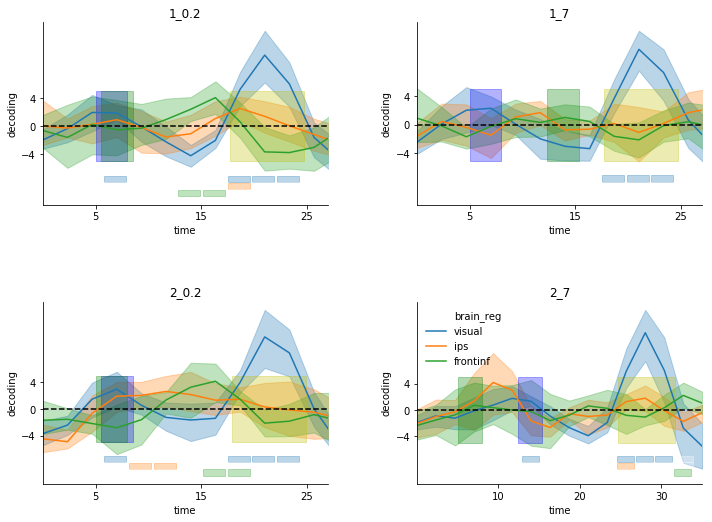

In [79]:
plot_decoding(df_plot_t)


In [5]:
Df

times   decoding    region subject condition   label
0    0.000   1.333718    visual    l001     1_0.2  signal
1    2.335   0.161902    visual    l001     1_0.2  signal
2    4.670   0.350452    visual    l001     1_0.2  signal
3    7.005   0.963944    visual    l001     1_0.2  signal
4    9.340  -0.829254    visual    l001     1_0.2  signal
5   11.675  -3.666776    visual    l001     1_0.2  signal
6   14.010  -4.697110    visual    l001     1_0.2  signal
7   16.345  -1.537573    visual    l001     1_0.2  signal
8   18.680   5.466152    visual    l001     1_0.2  signal
9   21.015  10.833892    visual    l001     1_0.2  signal
10  23.350   7.011465    visual    l001     1_0.2  signal
11  25.685   0.279462    visual    l001     1_0.2  signal
12  28.020  -2.761805    visual    l001     1_0.2  signal
13  30.355  -5.052658    visual    l001     1_0.2  signal
14  32.690  -2.949158    visual    l001     1_0.2  signal
15  35.025  -2.915288    visual    l001     1_0.2  signal
0    0.000  -3.507661  frontmid    b001       2_7  signal
1    2.335   1.412455  frontmid    b001       2_7  signal
2    4.670   1.403129  frontmid    b001       2_7  signal
3    7.005  -0.193131  frontmid    b001       2_7  signal
4    9.340   2.973368  frontmid    b001       2_7  signal
5   11.675   2.619165  frontmid    b001       2_7  signal
6   14.010   1.872331  frontmid    b001       2_7  signal
7   16.345   1.334139  frontmid    b001       2_7  signal
8   18.680  -2.094953  frontmid    b001       2_7  signal
9   21.015  -3.650142  frontmid    b001       2_7  signal
10  23.350  -3.216861  frontmid    b001       2_7  signal
11  25.685  -2.030363  frontmid    b001       2_7  signal
12  28.020   1.410350  frontmid    b001       2_7  signal
13  30.355   2.617006  frontmid    b001       2_7  signal
..     ...        ...       ...     ...       ...     ...
2    4.670  -0.816502  frontsup    d001     1_0.2  signal
3    7.005  -9.159421  frontsup    d001     1_0.2  signal
4    9.340  -6.201501  frontsup    d001     1_0.2  signal
5   11.675  -3.182794  frontsup    d001     1_0.2  signal
6   14.010   1.759758  frontsup    d001     1_0.2  signal
7   16.345   2.931867  frontsup    d001     1_0.2  signal
8   18.680  -1.390816  frontsup    d001     1_0.2  signal
9   21.015  -1.319375  frontsup    d001     1_0.2  signal
10  23.350   0.851916  frontsup    d001     1_0.2  signal
11  25.685   1.177681  frontsup    d001     1_0.2  signal
12  28.020   0.987618  frontsup    d001     1_0.2  signal
13  30.355   0.138225  frontsup    d001     1_0.2  signal
14  32.690  -0.835742  frontsup    d001     1_0.2  signal
15  35.025  -2.824743  frontsup    d001     1_0.2  signal
0    0.000  -3.699496    visual    n001     2_0.2  signal
1    2.335   0.234879    visual    n001     2_0.2  signal
2    4.670   3.979614    visual    n001     2_0.2  signal
3    7.005   6.160096    visual    n001     2_0.2  signal
4    9.340   1.747700    visual    n001     2_0.2  signal
5   11.675  -5.299672    visual    n001     2_0.2  signal
6   14.010  -8.343779    visual    n001     2_0.2  signal
7   16.345  -5.965920    visual    n001     2_0.2  signal
8   18.680   3.343777    visual    n001     2_0.2  signal
9   21.015  13.728478    visual    n001     2_0.2  signal
10  23.350  12.982452    visual    n001     2_0.2  signal
11  25.685   4.360092    visual    n001     2_0.2  signal
12  28.020  -3.309785    visual    n001     2_0.2  signal
13  30.355  -5.366212    visual    n001     2_0.2  signal
14  32.690  -1.945508    visual    n001     2_0.2  signal
15  35.025  -3.898994    visual    n001     2_0.2  signal

[1920 rows x 6 columns]

In [7]:
Df.loc[Df['subject']=='n001']

times   decoding    region subject condition   label
0    0.000   2.069228  frontsup    n001       1_7  signal
1    2.335  -0.726293  frontsup    n001       1_7  signal
2    4.670  -0.134756  frontsup    n001       1_7  signal
3    7.005   1.700853  frontsup    n001       1_7  signal
4    9.340  -1.305503  frontsup    n001       1_7  signal
5   11.675   0.091638  frontsup    n001       1_7  signal
6   14.010   4.412057  frontsup    n001       1_7  signal
7   16.345   1.511683  frontsup    n001       1_7  signal
8   18.680  -4.320230  frontsup    n001       1_7  signal
9   21.015  -5.111274  frontsup    n001       1_7  signal
10  23.350  -0.964382  frontsup    n001       1_7  signal
11  25.685   2.049562  frontsup    n001       1_7  signal
12  28.020   2.703033  frontsup    n001       1_7  signal
13  30.355   2.283229  frontsup    n001       1_7  signal
14  32.690  -0.033093  frontsup    n001       1_7  signal
15  35.025  -3.307578  frontsup    n001       1_7  signal
0    0.000  -1.538322       ips    n001     1_0.2  signal
1    2.335   2.676532       ips    n001     1_0.2  signal
2    4.670   4.761413       ips    n001     1_0.2  signal
3    7.005   4.538110       ips    n001     1_0.2  signal
4    9.340   0.256710       ips    n001     1_0.2  signal
5   11.675  -2.306320       ips    n001     1_0.2  signal
6   14.010  -4.582391       ips    n001     1_0.2  signal
7   16.345  -2.158582       ips    n001     1_0.2  signal
8   18.680   2.964852       ips    n001     1_0.2  signal
9   21.015   4.372697       ips    n001     1_0.2  signal
10  23.350   3.156326       ips    n001     1_0.2  signal
11  25.685  -0.505580       ips    n001     1_0.2  signal
12  28.020  -2.257497       ips    n001     1_0.2  signal
13  30.355  -2.215462       ips    n001     1_0.2  signal
..     ...        ...       ...     ...       ...     ...
2    4.670  -4.108839  frontmid    n001       2_7  signal
3    7.005   2.583684  frontmid    n001       2_7  signal
4    9.340   4.288797  frontmid    n001       2_7  signal
5   11.675  -0.695529  frontmid    n001       2_7  signal
6   14.010  -4.625370  frontmid    n001       2_7  signal
7   16.345  -5.424699  frontmid    n001       2_7  signal
8   18.680  -6.462843  frontmid    n001       2_7  signal
9   21.015  -3.262150  frontmid    n001       2_7  signal
10  23.350   0.521402  frontmid    n001       2_7  signal
11  25.685   1.712679  frontmid    n001       2_7  signal
12  28.020   2.567326  frontmid    n001       2_7  signal
13  30.355  -1.320126  frontmid    n001       2_7  signal
14  32.690  -3.767539  frontmid    n001       2_7  signal
15  35.025   1.668270  frontmid    n001       2_7  signal
0    0.000  -3.699496    visual    n001     2_0.2  signal
1    2.335   0.234879    visual    n001     2_0.2  signal
2    4.670   3.979614    visual    n001     2_0.2  signal
3    7.005   6.160096    visual    n001     2_0.2  signal
4    9.340   1.747700    visual    n001     2_0.2  signal
5   11.675  -5.299672    visual    n001     2_0.2  signal
6   14.010  -8.343779    visual    n001     2_0.2  signal
7   16.345  -5.965920    visual    n001     2_0.2  signal
8   18.680   3.343777    visual    n001     2_0.2  signal
9   21.015  13.728478    visual    n001     2_0.2  signal
10  23.350  12.982452    visual    n001     2_0.2  signal
11  25.685   4.360092    visual    n001     2_0.2  signal
12  28.020  -3.309785    visual    n001     2_0.2  signal
13  30.355  -5.366212    visual    n001     2_0.2  signal
14  32.690  -1.945508    visual    n001     2_0.2  signal
15  35.025  -3.898994    visual    n001     2_0.2  signal

[320 rows x 6 columns]

In [6]:
Df_shuff

times  decoding    region subject condition    label
0    0.000 -0.004730    visual    n001     1_0.2  shuffle
1    2.335 -3.396621    visual    n001     1_0.2  shuffle
2    4.670 -7.691852    visual    n001     1_0.2  shuffle
3    7.005 -4.385114    visual    n001     1_0.2  shuffle
4    9.340  2.781531    visual    n001     1_0.2  shuffle
5   11.675  2.020482    visual    n001     1_0.2  shuffle
6   14.010  4.379763    visual    n001     1_0.2  shuffle
7   16.345  5.585264    visual    n001     1_0.2  shuffle
8   18.680  2.723040    visual    n001     1_0.2  shuffle
9   21.015 -0.252185    visual    n001     1_0.2  shuffle
10  23.350 -3.756497    visual    n001     1_0.2  shuffle
11  25.685 -6.169889    visual    n001     1_0.2  shuffle
12  28.020 -4.531240    visual    n001     1_0.2  shuffle
13  30.355 -3.635020    visual    n001     1_0.2  shuffle
14  32.690  0.069825    visual    n001     1_0.2  shuffle
15  35.025  4.961986    visual    n001     1_0.2  shuffle
0    0.000 -1.403440    visual    n001     1_0.2  shuffle
1    2.335 -2.949172    visual    n001     1_0.2  shuffle
2    4.670 -5.785863    visual    n001     1_0.2  shuffle
3    7.005 -7.502873    visual    n001     1_0.2  shuffle
4    9.340 -0.657311    visual    n001     1_0.2  shuffle
5   11.675  6.273280    visual    n001     1_0.2  shuffle
6   14.010  4.987120    visual    n001     1_0.2  shuffle
7   16.345  4.162174    visual    n001     1_0.2  shuffle
8   18.680  3.228427    visual    n001     1_0.2  shuffle
9   21.015 -4.019214    visual    n001     1_0.2  shuffle
10  23.350 -5.927652    visual    n001     1_0.2  shuffle
11  25.685 -1.506474    visual    n001     1_0.2  shuffle
12  28.020  0.900196    visual    n001     1_0.2  shuffle
13  30.355  1.124896    visual    n001     1_0.2  shuffle
..     ...       ...       ...     ...       ...      ...
2    4.670 -6.576620  frontinf    l001       2_7  shuffle
3    7.005 -5.247003  frontinf    l001       2_7  shuffle
4    9.340 -1.682900  frontinf    l001       2_7  shuffle
5   11.675  0.991365  frontinf    l001       2_7  shuffle
6   14.010  3.951989  frontinf    l001       2_7  shuffle
7   16.345  4.194173  frontinf    l001       2_7  shuffle
8   18.680  4.451413  frontinf    l001       2_7  shuffle
9   21.015  3.463261  frontinf    l001       2_7  shuffle
10  23.350 -2.797551  frontinf    l001       2_7  shuffle
11  25.685 -2.246763  frontinf    l001       2_7  shuffle
12  28.020  6.137105  frontinf    l001       2_7  shuffle
13  30.355  2.574047  frontinf    l001       2_7  shuffle
14  32.690 -5.669565  frontinf    l001       2_7  shuffle
15  35.025 -5.634138  frontinf    l001       2_7  shuffle
0    0.000  2.601973  frontinf    l001       2_7  shuffle
1    2.335 -2.635742  frontinf    l001       2_7  shuffle
2    4.670 -7.393775  frontinf    l001       2_7  shuffle
3    7.005 -7.596433  frontinf    l001       2_7  shuffle
4    9.340 -0.803938  frontinf    l001       2_7  shuffle
5   11.675  5.980896  frontinf    l001       2_7  shuffle
6   14.010  3.350110  frontinf    l001       2_7  shuffle
7   16.345 -0.765639  frontinf    l001       2_7  shuffle
8   18.680  0.999902  frontinf    l001       2_7  shuffle
9   21.015  1.595533  frontinf    l001       2_7  shuffle
10  23.350  0.532542  frontinf    l001       2_7  shuffle
11  25.685  6.022492  frontinf    l001       2_7  shuffle
12  28.020  4.746371  frontinf    l001       2_7  shuffle
13  30.355 -3.506863  frontinf    l001       2_7  shuffle
14  32.690 -7.605727  frontinf    l001       2_7  shuffle
15  35.025 -5.134297  frontinf    l001       2_7  shuffle

[192000 rows x 6 columns]

In [10]:
path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM_response.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM_response.xlsx'
Df1 = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df1_shuff = pd.read_excel(path_save_shuffle)

In [11]:
Df1

times   decoding    region subject condition   label
0    0.000  -3.081107    visual    l001     1_0.2  signal
1    2.335  -2.141023    visual    l001     1_0.2  signal
2    4.670  -0.285979    visual    l001     1_0.2  signal
3    7.005   0.478277    visual    l001     1_0.2  signal
4    9.340   0.415545    visual    l001     1_0.2  signal
5   11.675  -1.095271    visual    l001     1_0.2  signal
6   14.010  -2.834326    visual    l001     1_0.2  signal
7   16.345  -1.263425    visual    l001     1_0.2  signal
8   18.680   5.431740    visual    l001     1_0.2  signal
9   21.015  12.585156    visual    l001     1_0.2  signal
10  23.350   6.854518    visual    l001     1_0.2  signal
11  25.685  -0.932502    visual    l001     1_0.2  signal
12  28.020  -1.808882    visual    l001     1_0.2  signal
13  30.355  -3.218533    visual    l001     1_0.2  signal
14  32.690  -2.918728    visual    l001     1_0.2  signal
15  35.025  -4.200198    visual    l001     1_0.2  signal
0    0.000  -4.595937  frontmid    b001       2_7  signal
1    2.335   2.205391  frontmid    b001       2_7  signal
2    4.670  -0.053355  frontmid    b001       2_7  signal
3    7.005  -1.571450  frontmid    b001       2_7  signal
4    9.340   3.618036  frontmid    b001       2_7  signal
5   11.675   3.035639  frontmid    b001       2_7  signal
6   14.010   0.756921  frontmid    b001       2_7  signal
7   16.345   0.713116  frontmid    b001       2_7  signal
8   18.680  -2.636256  frontmid    b001       2_7  signal
9   21.015  -4.062582  frontmid    b001       2_7  signal
10  23.350  -1.251994  frontmid    b001       2_7  signal
11  25.685   0.468387  frontmid    b001       2_7  signal
12  28.020   3.827633  frontmid    b001       2_7  signal
13  30.355   4.421499  frontmid    b001       2_7  signal
..     ...        ...       ...     ...       ...     ...
2    4.670  -1.883163  frontsup    d001     1_0.2  signal
3    7.005  -3.455249  frontsup    d001     1_0.2  signal
4    9.340  -2.901685  frontsup    d001     1_0.2  signal
5   11.675  -2.322785  frontsup    d001     1_0.2  signal
6   14.010   2.818456  frontsup    d001     1_0.2  signal
7   16.345   3.890516  frontsup    d001     1_0.2  signal
8   18.680   0.621142  frontsup    d001     1_0.2  signal
9   21.015  -3.239490  frontsup    d001     1_0.2  signal
10  23.350  -2.219077  frontsup    d001     1_0.2  signal
11  25.685   1.794221  frontsup    d001     1_0.2  signal
12  28.020   1.378784  frontsup    d001     1_0.2  signal
13  30.355   1.374953  frontsup    d001     1_0.2  signal
14  32.690  -0.040435  frontsup    d001     1_0.2  signal
15  35.025  -2.285150  frontsup    d001     1_0.2  signal
0    0.000  -2.665060    visual    n001     2_0.2  signal
1    2.335   0.547131    visual    n001     2_0.2  signal
2    4.670   3.679087    visual    n001     2_0.2  signal
3    7.005   5.243614    visual    n001     2_0.2  signal
4    9.340   1.311271    visual    n001     2_0.2  signal
5   11.675  -4.988393    visual    n001     2_0.2  signal
6   14.010  -8.537759    visual    n001     2_0.2  signal
7   16.345  -5.998351    visual    n001     2_0.2  signal
8   18.680   3.258998    visual    n001     2_0.2  signal
9   21.015  14.569701    visual    n001     2_0.2  signal
10  23.350  14.578036    visual    n001     2_0.2  signal
11  25.685   3.995475    visual    n001     2_0.2  signal
12  28.020  -4.837064    visual    n001     2_0.2  signal
13  30.355  -4.324616    visual    n001     2_0.2  signal
14  32.690  -0.494240    visual    n001     2_0.2  signal
15  35.025  -3.842878    visual    n001     2_0.2  signal

[1920 rows x 6 columns]

In [16]:
#Distractor_far
path_ox = 'C:\\Users\\David\\Desktop\\dist_far\\boots_LM_dist_boot_far_ox.xlsx'
path_nit = 'C:\\Users\\David\\Desktop\\dist_far\\boots_LM_dist_boot_far_nit.xlsx'
path_hid = 'C:\\Users\\David\\Desktop\\dist_far\\boots_LM_dist_boot_far_hid.xlsx'


path_ox = 'C:\\Users\\David\\Desktop\\dist_far\\signal_LM_dist_boot_far_ox.xlsx'
path_nit = 'C:\\Users\\David\\Desktop\\dist_far\\signal_LM_dist_boot_far_nit.xlsx'
path_hid = 'C:\\Users\\David\\Desktop\\dist_far\\signal_LM_dist_boot_far_hid.xlsx'

df_ox = pd.read_excel(path_ox)
df_nit = pd.read_excel(path_nit)
df_hid = pd.read_excel(path_hid)


Df3 = pd.concat([df_ox, df_nit, df_hid], ignore_index=True)

In [15]:
Df2

times   decoding    region subject condition  label
0       0.000   0.875500    visual    n001     1_0.2  boots
1       2.335   0.424140    visual    n001     1_0.2  boots
2       4.670   9.635254    visual    n001     1_0.2  boots
3       7.005  16.634752    visual    n001     1_0.2  boots
4       9.340   8.018618    visual    n001     1_0.2  boots
5      11.675  -1.362616    visual    n001     1_0.2  boots
6      14.010  -3.239958    visual    n001     1_0.2  boots
7      16.345  -5.248159    visual    n001     1_0.2  boots
8      18.680 -11.078255    visual    n001     1_0.2  boots
9      21.015 -12.199799    visual    n001     1_0.2  boots
10     23.350  -8.475312    visual    n001     1_0.2  boots
11     25.685  -0.096261    visual    n001     1_0.2  boots
12     28.020   3.010174    visual    n001     1_0.2  boots
13     30.355   3.285416    visual    n001     1_0.2  boots
14     32.690   6.015710    visual    n001     1_0.2  boots
15     35.025   6.902392    visual    n001     1_0.2  boots
16      0.000  -4.114385    visual    n001     1_0.2  boots
17      2.335   2.310784    visual    n001     1_0.2  boots
18      4.670   3.175102    visual    n001     1_0.2  boots
19      7.005   5.851055    visual    n001     1_0.2  boots
20      9.340   8.129966    visual    n001     1_0.2  boots
21     11.675   3.752967    visual    n001     1_0.2  boots
22     14.010   0.591439    visual    n001     1_0.2  boots
23     16.345  -1.748326    visual    n001     1_0.2  boots
24     18.680  -9.629066    visual    n001     1_0.2  boots
25     21.015 -12.219804    visual    n001     1_0.2  boots
26     23.350  -8.270265    visual    n001     1_0.2  boots
27     25.685   3.409455    visual    n001     1_0.2  boots
28     28.020   5.212283    visual    n001     1_0.2  boots
29     30.355  -1.016690    visual    n001     1_0.2  boots
...       ...        ...       ...     ...       ...    ...
76770   4.670  -6.227936  frontinf    b001       2_7  boots
76771   7.005   5.003939  frontinf    b001       2_7  boots
76772   9.340   3.546451  frontinf    b001       2_7  boots
76773  11.675   2.053342  frontinf    b001       2_7  boots
76774  14.010   5.620109  frontinf    b001       2_7  boots
76775  16.345   6.327658  frontinf    b001       2_7  boots
76776  18.680   2.405543  frontinf    b001       2_7  boots
76777  21.015  -1.481022  frontinf    b001       2_7  boots
76778  23.350   7.264114  frontinf    b001       2_7  boots
76779  25.685   6.140525  frontinf    b001       2_7  boots
76780  28.020  -5.965199  frontinf    b001       2_7  boots
76781  30.355  -9.391641  frontinf    b001       2_7  boots
76782  32.690  -1.342335  frontinf    b001       2_7  boots
76783  35.025   1.033338  frontinf    b001       2_7  boots
76784   0.000   1.422861  frontinf    b001       2_7  boots
76785   2.335  -1.237156  frontinf    b001       2_7  boots
76786   4.670  -3.318211  frontinf    b001       2_7  boots
76787   7.005  -2.520423  frontinf    b001       2_7  boots
76788   9.340  -4.079481  frontinf    b001       2_7  boots
76789  11.675   3.287369  frontinf    b001       2_7  boots
76790  14.010   7.243880  frontinf    b001       2_7  boots
76791  16.345   1.862598  frontinf    b001       2_7  boots
76792  18.680   1.548358  frontinf    b001       2_7  boots
76793  21.015   0.209721  frontinf    b001       2_7  boots
76794  23.350   2.661510  frontinf    b001       2_7  boots
76795  25.685   8.939975  frontinf    b001       2_7  boots
76796  28.020   4.233484  frontinf    b001       2_7  boots
76797  30.355   2.826271  frontinf    b001       2_7  boots
76798  32.690   1.077246  frontinf    b001       2_7  boots
76799  35.025 -11.253940  frontinf    b001       2_7  boots

[76800 rows x 6 columns]

In [25]:
Df3.times.unique().size * Df3.subject.unique().size * Df3.region.unique().size * Df3.condition.unique().size


1536

In [26]:
Df.times.unique().size * Df.subject.unique().size * Df.region.unique().size * Df.condition.unique().size


1920

In [30]:
Df.region.unique().size, Df3.region.unique().size

(5, 4)

In [32]:
Df3.region.unique()

Df.region.unique()

array(['visual', 'frontmid', 'frontinf', 'frontsup', 'ips'], dtype=object)

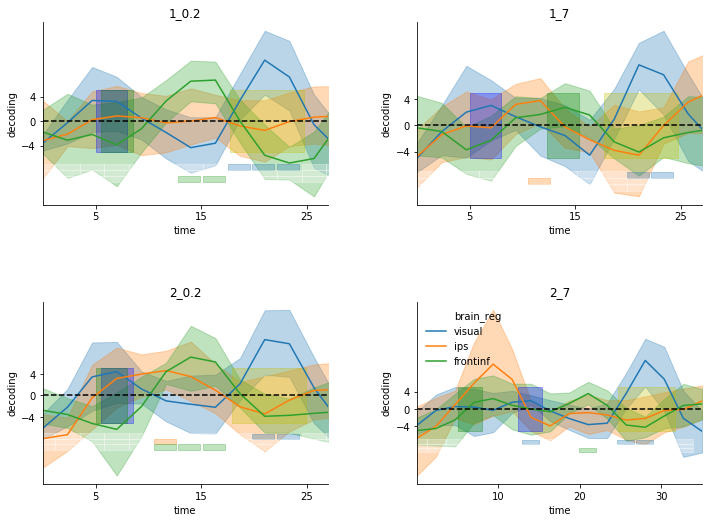

In [80]:
##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: #['visual', 'ips', 'pfc']: ['front_sup', 'front_mid', 'front_inf']
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_t.subject.unique():
            #decode_timepoint = []
            for times in df_t.times.unique():    
                values = df_t.loc[(df_t['label']=='shuffle') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_t.loc[(df_t['label']=='signal') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values))
                    subj_decoding.append([prediction, times, subject, brain_region, condition])

                    

                    
#
dft = pd.DataFrame(subj_decoding) 
dft.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dft.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dft.loc[(dft['condition']==condition) & (dft['times']==time) & (dft['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_t = pd.DataFrame(df_plot) 
df_plot_t.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_t)

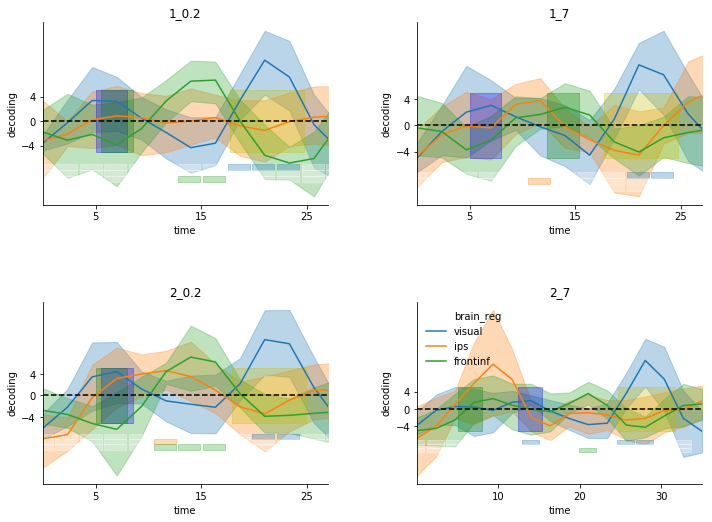

In [83]:
plot_decoding(df_plot_t)

In [17]:
real = [values_boot.values[0]]
fake = list(values.values)


In [19]:
from mlxtend.evaluate import permutation_test
p_value = permutation_test(real, fake, method='approximate', num_rounds=10000, seed=0)

p_value

0.1058

In [24]:
p_vals=[]
for brain_region in ['visual', 'ips', 'frontinf']: 
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
        for times in df_t.times.unique():
            values = df_t.loc[(df_t['label']=='shuffle') & (df_t['condition']==condition) & (df_t['region'] ==brain_region) & (df_t['times']==times), 'decoding'] ## all shuffled reconstructions
            values_boot = df_t.loc[(df_t['label']=='signal') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['times']==times), 'decoding'] ## bootstrap reconstructions
            real = [values_boot.values[0]]
            fake = list(values.values)
            p_value = permutation_test(real, fake, method='approximate', num_rounds=10000, seed=0)
            p_vals.append([p_value, brain_region, condition, times])

            
df_p_vals=pd.DataFrame(p_vals)
df_p_vals.columns=[ 'p_val', 'brain_region', 'condition', 'times' ]
               

0         1      2
0    0.8584    visual  1_0.2
1    0.9319    visual  1_0.2
2    0.8985    visual  1_0.2
3    0.6102    visual  1_0.2
4    0.9340    visual  1_0.2
5    0.2246    visual  1_0.2
6    0.2494    visual  1_0.2
7    0.4022    visual  1_0.2
8    0.1871    visual  1_0.2
9    0.0000    visual  1_0.2
10   0.0407    visual  1_0.2
11   0.7342    visual  1_0.2
12   0.4016    visual  1_0.2
13   0.0300    visual  1_0.2
14   0.4685    visual  1_0.2
15   0.3556    visual  1_0.2
16   0.0721    visual    1_7
17   0.5262    visual    1_7
18   0.7379    visual    1_7
19   0.6642    visual    1_7
20   0.5681    visual    1_7
21   0.1836    visual    1_7
22   0.5727    visual    1_7
23   0.9249    visual    1_7
24   0.0654    visual    1_7
25   0.0000    visual    1_7
26   0.3055    visual    1_7
27   0.2506    visual    1_7
28   0.0131    visual    1_7
29   0.0017    visual    1_7
..      ...       ...    ...
162  0.2549  frontinf  2_0.2
163  0.3075  frontinf  2_0.2
164  0.7885  frontinf  2_0.2
165  0.0861  frontinf  2_0.2
166  0.0859  frontinf  2_0.2
167  0.0199  frontinf  2_0.2
168  0.9878  frontinf  2_0.2
169  0.1283  frontinf  2_0.2
170  0.1160  frontinf  2_0.2
171  0.1685  frontinf  2_0.2
172  0.1936  frontinf  2_0.2
173  0.2102  frontinf  2_0.2
174  0.0599  frontinf  2_0.2
175  0.4259  frontinf  2_0.2
176  0.0068  frontinf    2_7
177  0.2636  frontinf    2_7
178  0.8033  frontinf    2_7
179  0.2221  frontinf    2_7
180  0.0223  frontinf    2_7
181  0.1626  frontinf    2_7
182  0.5407  frontinf    2_7
183  0.8825  frontinf    2_7
184  0.9124  frontinf    2_7
185  0.8554  frontinf    2_7
186  0.3014  frontinf    2_7
187  0.0111  frontinf    2_7
188  0.2687  frontinf    2_7
189  0.7380  frontinf    2_7
190  0.5569  frontinf    2_7
191  0.8017  frontinf    2_7

[192 rows x 3 columns]

In [31]:
save_=[]

for brain_region in ['visual', 'ips', 'frontinf']: #['visual', 'ips', 'pfc']: ['front_sup', 'front_mid', 'front_inf']
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_t.subject.unique():
            for times in df_t.times.unique():  
                values_boot = df_t.loc[(df_t['label']=='shuffle') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## bootstrap reconstructions
                mean_sh = values_boot.mean()
                std_sh = values_boot.std()
                save_.append([mean_sh, std_sh, brain_region, condition, subject, times])

####

                

In [35]:
save_ = pd.DataFrame(save_)
save_.columns = ['mean', 'std', 'brain_region', 'condition', 'subject', 'time' ]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


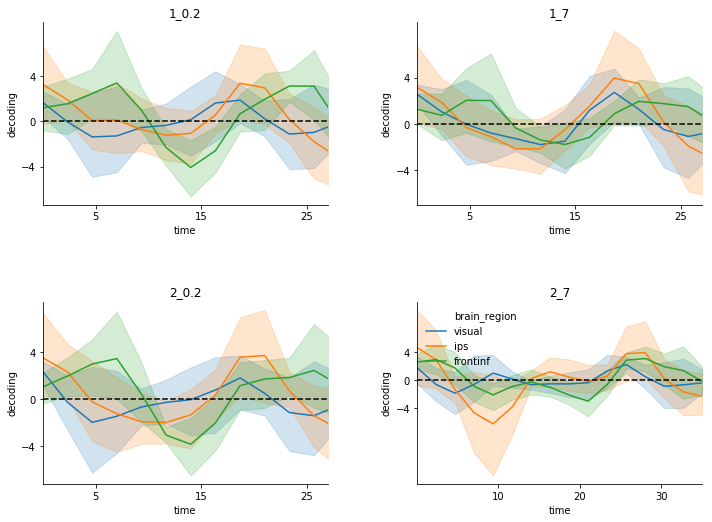

In [40]:


pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
##
fig = plt.figure(figsize=(10,8))
for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
    #features of the plot for the different conditions. Fixed values
    if condition == '1_0.2':
        delay1 = 0.2
        delay2 = 11.8
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [0, 27]

    elif condition == '1_7':
        delay1 = 7
        delay2 = 5
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [0, 27]

    elif condition == '2_0.2':
        delay1 = 0.2
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2   
        xlim = [0, 27]

    elif condition == '2_7':
        delay1 = 7
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2
        xlim = [0, 35]


    start_hrf = 4 #start of the Hemodynamic response (4seconds)
    sec_hdrf = 3 #time it can last

    d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
    t_p1 = (start_hrf +t_p) ## strat of target (time)
    r_t1=  (start_hrf + r_t) ## start of response (time)
    #
    d_p2 = d_p1 + sec_hdrf # end of distractor (time)
    t_p2 = t_p1 + sec_hdrf # end of target (time)
    r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

    y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
    y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

    #fig = plt.figure()
    ax = fig.add_subplot(2,2, indx_c+1) 
    #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
    #ax.lines[0].set_linestyle("--")
    data_cond =  save_.loc[ (save_['condition']==condition)]
    sns.lineplot( ax=ax, x="time", y="mean", hue='brain_region', hue_order =  ['visual', 'ips', 'frontinf'], ci=95, palette=pal, data=data_cond) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
    #plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['brain_region']=='visual', 'inf']) , list(data_cond.loc[data_cond['brain_region']=='visual', 'sup']) , color=pal[0], alpha=0.3) #, label='target'  ) #plot aprox time of target
    #plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['brain_region']=='ips', 'inf']) , list(data_cond.loc[data_cond['brain_region']=='ips', 'sup']) , color=pal[1], alpha=0.3) #, label='target'  ) #plot aprox time of target
    #plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['brain_region']=='frontinf', 'inf']) , list(data_cond.loc[data_cond['brain_region']=='frontinf', 'sup']) , color=pal[2], alpha=0.3) #, label='target'  ) #plot aprox time of target
    #sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=95, palette=pal, data=dfsn.loc[ (dfsn['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'

    plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
    #plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
    #plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
    #plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

    ## Plot the significance line
#     for index_color, brain_reg in enumerate(['visual', 'ips', 'frontinf']):
#         all_timepoints = list( data_cond.loc[data_cond['brain_region']==brain_reg].time )
#         conf_inf = list( data_cond.loc[data_cond['brain_region']==brain_reg].inf )
#         conf_sup = list( data_cond.loc[data_cond['brain_region']==brain_reg].sup )
#         color_sign = pal[index_color]
#         y_min_shad = -5 - index_color
#         y_max_shad = -6 - index_color
#         #line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)
    #
    ###
    TITLE_BR = condition 
    plt.title(TITLE_BR) #condition title
    plt.gca().spines['right'].set_visible(False) #no right axis
    plt.gca().spines['top'].set_visible(False) #no  top axis
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.xticks([5,15,25]) #just this tcks
    plt.yticks([-4, 0 , 4])
    plt.xlim(xlim)
    plt.ylabel('decoding')
    if indx_c==3: #legend in just this condition (to avoid repetitions)       
        plt.gca().legend(loc= 2, frameon=False)
        plt.xticks([10, 20 ,30])

    else:
        plt.gca().legend(loc= 1, frameon=False).remove()



##
plt.suptitle( '', fontsize=18) ## main title
plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
plt.show(block=False) #show
    

Important!!!! Be careful!!!!

## Target

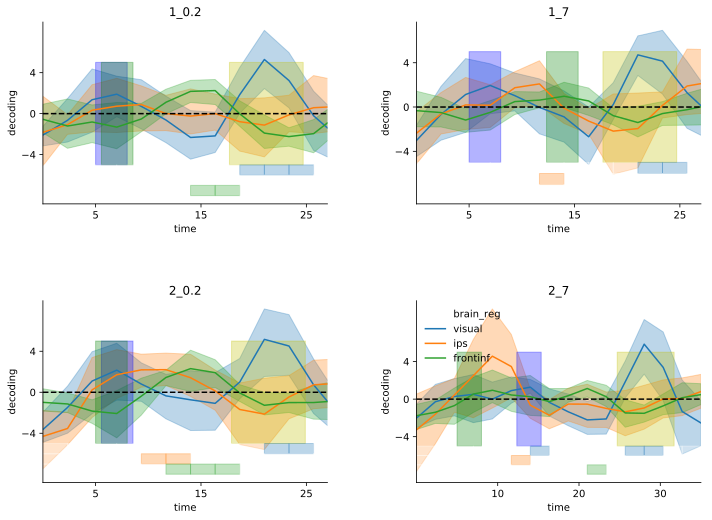

In [17]:
path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM.xlsx'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)
df_t = pd.concat([Df, Df_shuff]) #concatenate the files


##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: #['visual', 'ips', 'pfc']: ['front_sup', 'front_mid', 'front_inf']
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_t.subject.unique():
            #decode_timepoint = []
            for times in df_t.times.unique():    
                values = df_t.loc[(df_t['label']=='shuffle') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_t.loc[(df_t['label']=='signal') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dft = pd.DataFrame(subj_decoding) 
dft.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dft.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dft.loc[(dft['condition']==condition) & (dft['times']==time) & (dft['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_t = pd.DataFrame(df_plot) 
df_plot_t.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_t)

## Distractor

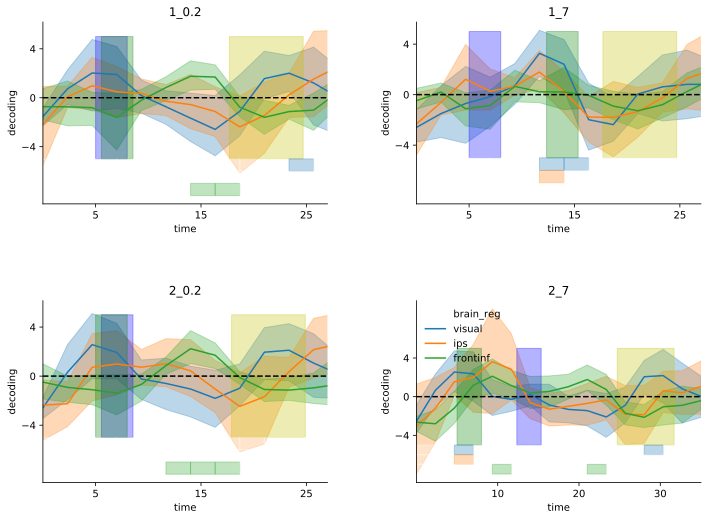

In [18]:
path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM_dist.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM_dist.xlsx'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)
df_d = pd.concat([Df, Df_shuff]) #concatenate the files


##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: 
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_d.subject.unique():
            #decode_timepoint = []
            for times in df_d.times.unique():    
                values = df_d.loc[(df_d['label']=='shuffle') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_d.loc[(df_d['label']=='signal') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dfd = pd.DataFrame(subj_decoding) 
dfd.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dfd.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dfd.loc[(dfd['condition']==condition) & (dfd['times']==time) & (dfd['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_d = pd.DataFrame(df_plot) 
df_plot_d.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_d)

## Response

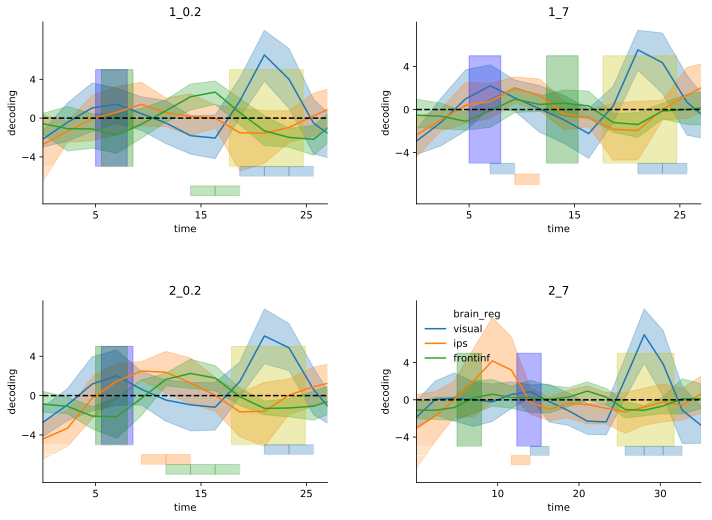

In [19]:
path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM_response.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM_response.xlsx'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)
df_r = pd.concat([Df, Df_shuff]) #concatenate the files


##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: 
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_r.subject.unique():
            #decode_timepoint = []
            for times in df_r.times.unique():    
                values = df_r.loc[(df_r['label']=='shuffle') & (df_r['condition']==condition) & (df_r['region'] ==brain_region)  & (df_r['subject'] ==subject) & (df_r['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_r.loc[(df_r['label']=='signal') & (df_r['condition']==condition) & (df_r['region'] ==brain_region)  & (df_r['subject'] ==subject) & (df_r['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dfr = pd.DataFrame(subj_decoding) 
dfr.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dfd.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dfr.loc[(dfr['condition']==condition) & (dfr['times']==time) & (dfr['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_r = pd.DataFrame(df_plot) 
df_plot_r.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_r)

In [20]:
df_plot_t['decode']='target'
df_plot_d['decode']='distractor'
df_plot_r['decode']='response'

df_td = pd.concat([df_plot_t, df_plot_d])

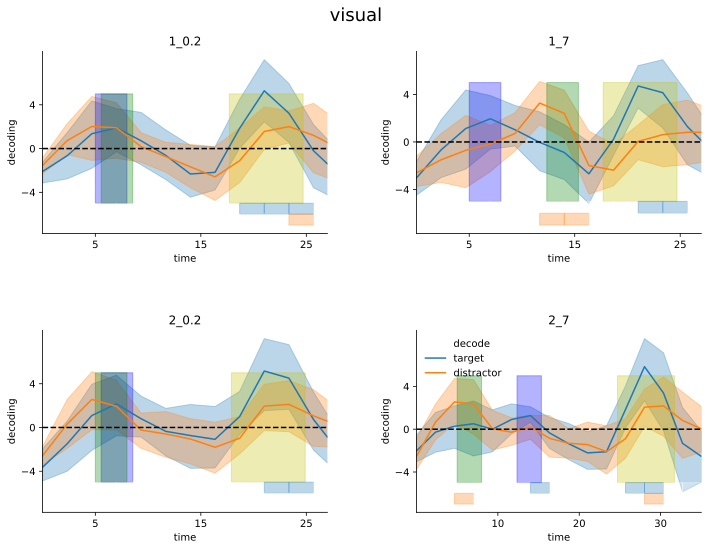

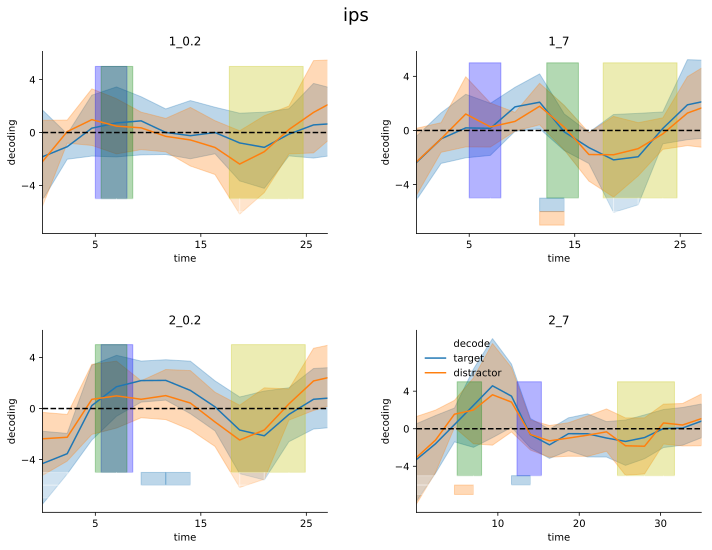

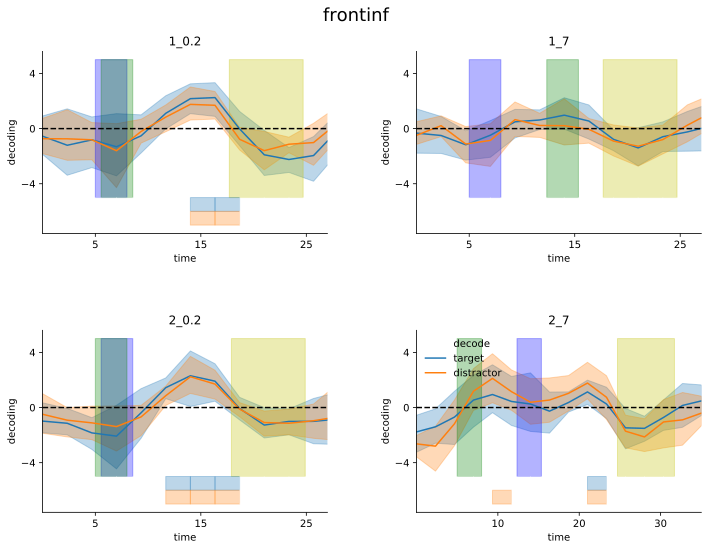

In [41]:
pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:2]

for Brain_region in ['visual', 'ips', 'frontinf']:
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [0, 27]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [0, 35]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
        #ax.lines[0].set_linestyle("--")
        data_cond =  df_td.loc[ (df_td['condition']==condition) & (df_td['brain_reg']==Brain_region)]
        sns.lineplot( ax=ax, x="time", y="new_mean", hue='decode', hue_order =  ['target', 'distractor'], ci=None, palette=pal, data=data_cond) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='target', 'inf']) , list(data_cond.loc[data_cond['decode']=='target', 'sup']) , color=pal[0], alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='distractor', 'inf']) , list(data_cond.loc[data_cond['decode']=='distractor', 'sup']) , color=pal[1], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='response', 'inf']) , list(data_cond.loc[data_cond['decode']=='response', 'sup']) , color=pal[2], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=95, palette=pal, data=dfsn.loc[ (dfsn['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'

        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        for index_color, decode_reg in enumerate(['target', 'distractor']):
            all_timepoints = list( data_cond.loc[data_cond['decode']==decode_reg].time )
            conf_inf = list( data_cond.loc[data_cond['decode']==decode_reg].inf )
            conf_sup = list( data_cond.loc[data_cond['decode']==decode_reg].sup )
            color_sign = pal[index_color]
            y_min_shad = -5 - index_color
            y_max_shad = -6 - index_color
            line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( Brain_region, fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    

## Close (target and distractor)

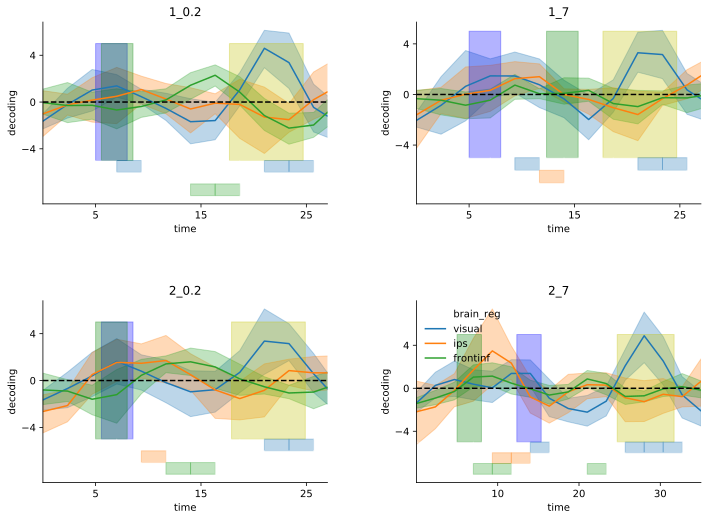

In [49]:
#Target_close
path_ox = 'C:\\Users\\David\\Desktop\\close\\boots_LM_response_boot_close_ox.xlsx'
path_nit = 'C:\\Users\\David\\Desktop\\close\\boots_LM_response_boot_close_nit.xlsx'
path_hid = 'C:\\Users\\David\\Desktop\\close\\boots_LM_response_boot_close_hid.xlsx'

path_ox_shuffle = 'C:\\Users\\David\\Desktop\\close\\shuff_LM_response_boot_close_ox.xlsx'
path_nit_shuffle = 'C:\\Users\\David\\Desktop\\close\\shuff_LM_response_boot_close_nit.xlsx'
path_hid_shuffle = 'C:\\Users\\David\\Desktop\\close\\shuff_LM_response_boot_close_hid.xlsx'

df_ox = pd.read_excel(path_ox)
df_nit = pd.read_excel(path_nit)
df_hid = pd.read_excel(path_hid)

shuff_ox = pd.read_excel(path_ox_shuffle)
shuff_nit = pd.read_excel(path_nit_shuffle)
shuff_hid = pd.read_excel(path_hid_shuffle)

Df = pd.concat([df_ox, df_nit, df_hid], ignore_index=True)
Df_shuff = pd.concat([shuff_ox, shuff_nit, shuff_hid], ignore_index=True)

df_t = pd.concat([Df, Df_shuff]) #concatenate the files

##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: #['visual', 'ips', 'pfc']: ['front_sup', 'front_mid', 'front_inf']
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_t.subject.unique():
            #decode_timepoint = []
            for times in df_t.times.unique():    
                values = df_t.loc[(df_t['label']=='shuffle') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_t.loc[(df_t['label']=='boots') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dft = pd.DataFrame(subj_decoding) 
dft.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dft.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dft.loc[(dft['condition']==condition) & (dft['times']==time) & (dft['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_tc = pd.DataFrame(df_plot) 
df_plot_tc.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle
##
plot_decoding(df_plot_tc)


plot_decoding(df_plot_tc)

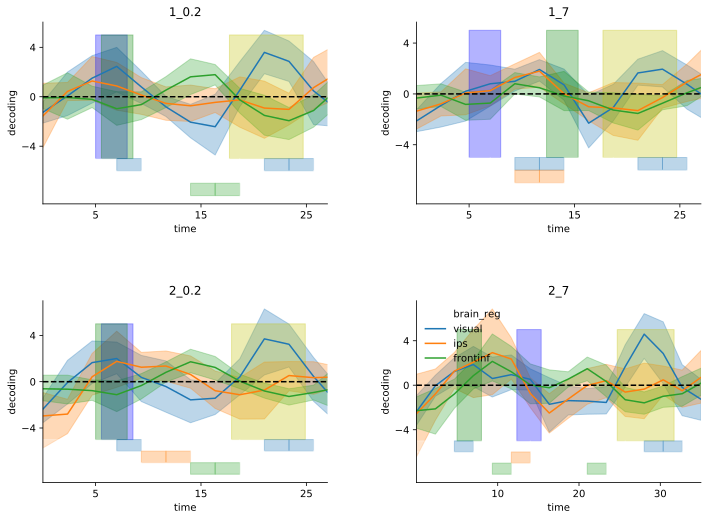

In [50]:
#Distractor_close
path_ox = 'C:\\Users\\David\\Desktop\\dist_close\\boots_LM_dist_boot_close_ox.xlsx'
path_nit = 'C:\\Users\\David\\Desktop\\dist_close\\boots_LM_dist_boot_close_nit.xlsx'
path_hid = 'C:\\Users\\David\\Desktop\\dist_close\\boots_LM_dist_boot_close_hid.xlsx'

path_ox_shuffle = 'C:\\Users\\David\\Desktop\\dist_close\\shuff_LM_dist_boot_close_ox.xlsx'
path_nit_shuffle = 'C:\\Users\\David\\Desktop\\dist_close\\shuff_LM_dist_boot_close_nit.xlsx'
path_hid_shuffle = 'C:\\Users\\David\\Desktop\\dist_close\\shuff_LM_dist_boot_close_hid.xlsx'


df_ox = pd.read_excel(path_ox)
df_nit = pd.read_excel(path_nit)
df_hid = pd.read_excel(path_hid)

shuff_ox = pd.read_excel(path_ox_shuffle)
shuff_nit = pd.read_excel(path_nit_shuffle)
shuff_hid = pd.read_excel(path_hid_shuffle)

Df = pd.concat([df_ox, df_nit, df_hid], ignore_index=True)
Df_shuff = pd.concat([shuff_ox, shuff_nit, shuff_hid], ignore_index=True)
df_d = pd.concat([Df, Df_shuff]) #concatenate the files


##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: 
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_d.subject.unique():
            #decode_timepoint = []
            for times in df_d.times.unique():    
                values = df_d.loc[(df_d['label']=='shuffle') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_d.loc[(df_d['label']=='boots') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dfd = pd.DataFrame(subj_decoding) 
dfd.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dfd.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dfd.loc[(dfd['condition']==condition) & (dfd['times']==time) & (dfd['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_dc = pd.DataFrame(df_plot) 
df_plot_dc.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_dc)

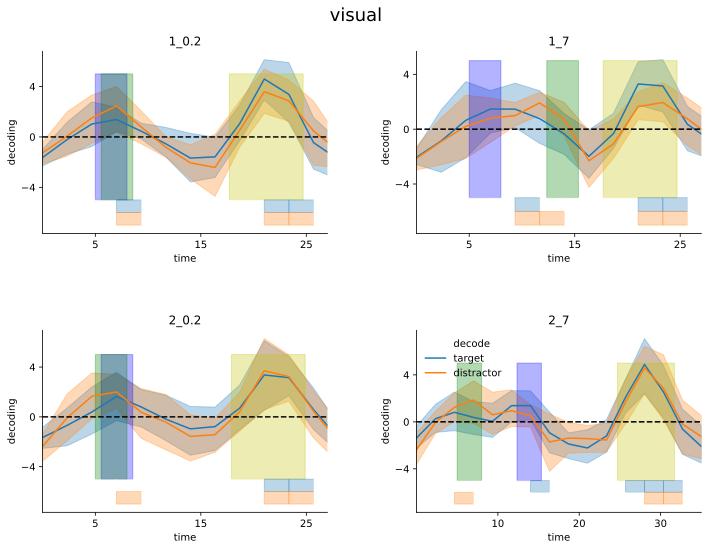

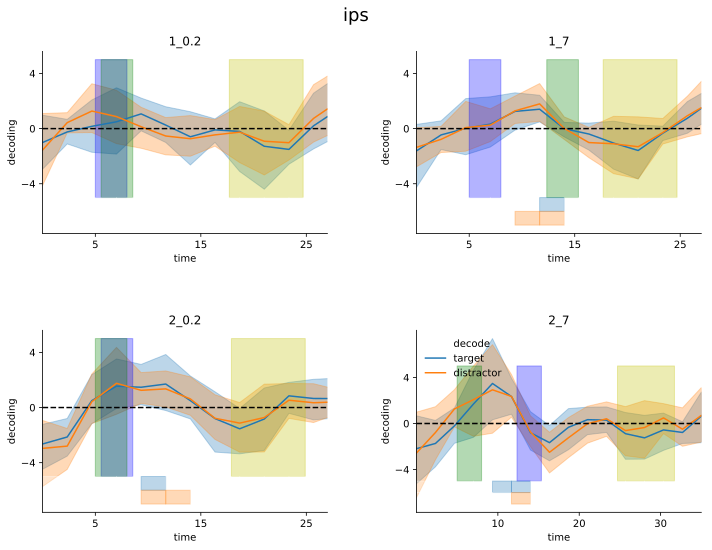

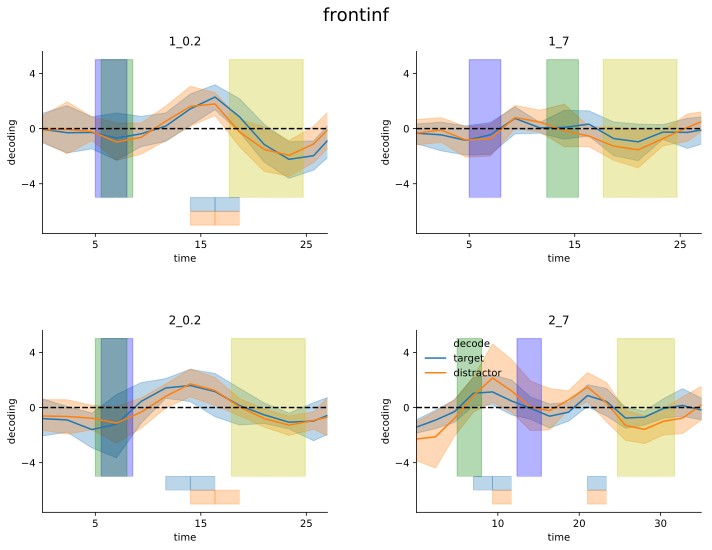

In [52]:
df_plot_tc['decode']='target'
df_plot_dc['decode']='distractor'

df_tdc = pd.concat([df_plot_tc, df_plot_dc])

pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:2]

for Brain_region in ['visual', 'ips', 'frontinf']:
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [0, 27]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [0, 35]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
        #ax.lines[0].set_linestyle("--")
        data_cond =  df_tdc.loc[ (df_tdc['condition']==condition) & (df_tdc['brain_reg']==Brain_region)]
        sns.lineplot( ax=ax, x="time", y="new_mean", hue='decode', hue_order =  ['target', 'distractor'], ci=None, palette=pal, data=data_cond) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='target', 'inf']) , list(data_cond.loc[data_cond['decode']=='target', 'sup']) , color=pal[0], alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='distractor', 'inf']) , list(data_cond.loc[data_cond['decode']=='distractor', 'sup']) , color=pal[1], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='response', 'inf']) , list(data_cond.loc[data_cond['decode']=='response', 'sup']) , color=pal[2], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=95, palette=pal, data=dfsn.loc[ (dfsn['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'

        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        for index_color, decode_reg in enumerate(['target', 'distractor']):
            all_timepoints = list( data_cond.loc[data_cond['decode']==decode_reg].time )
            conf_inf = list( data_cond.loc[data_cond['decode']==decode_reg].inf )
            conf_sup = list( data_cond.loc[data_cond['decode']==decode_reg].sup )
            color_sign = pal[index_color]
            y_min_shad = -5 - index_color
            y_max_shad = -6 - index_color
            line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( Brain_region, fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    
    


## Far

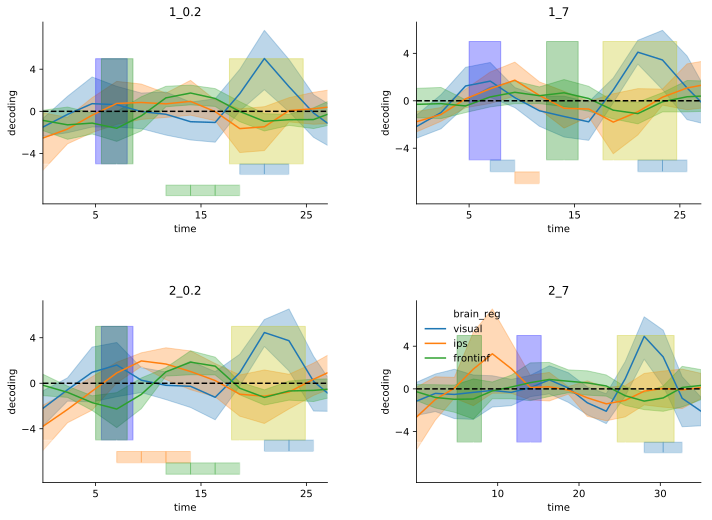

In [53]:
#Target_far
path_ox = 'C:\\Users\\David\\Desktop\\far\\boots_LM_response_boot_far_ox.xlsx'
path_nit = 'C:\\Users\\David\\Desktop\\far\\boots_LM_response_boot_far_nit.xlsx'
path_hid = 'C:\\Users\\David\\Desktop\\far\\boots_LM_response_boot_far_hid.xlsx'

path_ox_shuffle = 'C:\\Users\\David\\Desktop\\far\\shuff_LM_response_boot_far_ox.xlsx'
path_nit_shuffle = 'C:\\Users\\David\\Desktop\\far\\shuff_LM_response_boot_far_nit.xlsx'
path_hid_shuffle = 'C:\\Users\\David\\Desktop\\far\\shuff_LM_response_boot_far_hid.xlsx'

df_ox = pd.read_excel(path_ox)
df_nit = pd.read_excel(path_nit)
df_hid = pd.read_excel(path_hid)

shuff_ox = pd.read_excel(path_ox_shuffle)
shuff_nit = pd.read_excel(path_nit_shuffle)
shuff_hid = pd.read_excel(path_hid_shuffle)

Df = pd.concat([df_ox, df_nit, df_hid], ignore_index=True)
Df_shuff = pd.concat([shuff_ox, shuff_nit, shuff_hid], ignore_index=True)

df_t = pd.concat([Df, Df_shuff]) #concatenate the files

##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: #['visual', 'ips', 'pfc']: ['front_sup', 'front_mid', 'front_inf']
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_t.subject.unique():
            #decode_timepoint = []
            for times in df_t.times.unique():    
                values = df_t.loc[(df_t['label']=='shuffle') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_t.loc[(df_t['label']=='boots') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dft = pd.DataFrame(subj_decoding) 
dft.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dft.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dft.loc[(dft['condition']==condition) & (dft['times']==time) & (dft['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_tf = pd.DataFrame(df_plot) 
df_plot_tf.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle
##
plot_decoding(df_plot_tf)


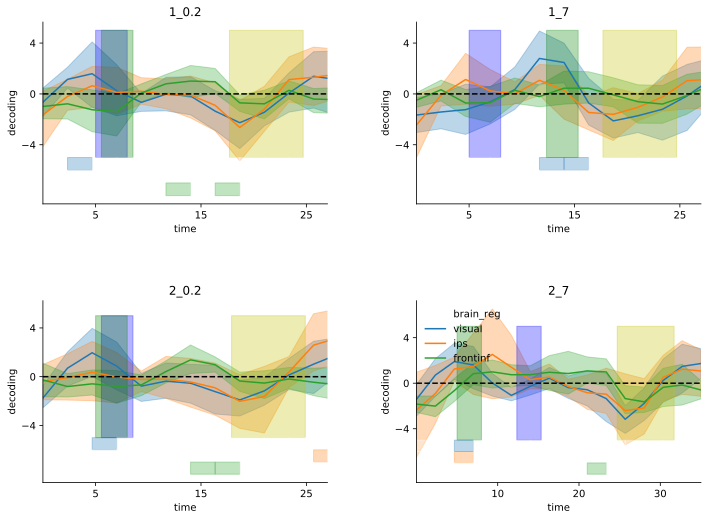

In [54]:
#Distractor_far
path_ox = 'C:\\Users\\David\\Desktop\\dist_far\\boots_LM_dist_boot_far_ox.xlsx'
path_nit = 'C:\\Users\\David\\Desktop\\dist_far\\boots_LM_dist_boot_far_nit.xlsx'
path_hid = 'C:\\Users\\David\\Desktop\\dist_far\\boots_LM_dist_boot_far_hid.xlsx'

path_ox_shuffle = 'C:\\Users\\David\\Desktop\\dist_far\\shuff_LM_dist_boot_far_ox.xlsx'
path_nit_shuffle = 'C:\\Users\\David\\Desktop\\dist_far\\shuff_LM_dist_boot_far_nit.xlsx'
path_hid_shuffle = 'C:\\Users\\David\\Desktop\\dist_far\\shuff_LM_dist_boot_far_hid.xlsx'


df_ox = pd.read_excel(path_ox)
df_nit = pd.read_excel(path_nit)
df_hid = pd.read_excel(path_hid)

shuff_ox = pd.read_excel(path_ox_shuffle)
shuff_nit = pd.read_excel(path_nit_shuffle)
shuff_hid = pd.read_excel(path_hid_shuffle)

Df = pd.concat([df_ox, df_nit, df_hid], ignore_index=True)
Df_shuff = pd.concat([shuff_ox, shuff_nit, shuff_hid], ignore_index=True)
df_d = pd.concat([Df, Df_shuff]) #concatenate the files


##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: 
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_d.subject.unique():
            #decode_timepoint = []
            for times in df_d.times.unique():    
                values = df_d.loc[(df_d['label']=='shuffle') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_d.loc[(df_d['label']=='boots') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dfd = pd.DataFrame(subj_decoding) 
dfd.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dfd.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dfd.loc[(dfd['condition']==condition) & (dfd['times']==time) & (dfd['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_df = pd.DataFrame(df_plot) 
df_plot_df.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_df)

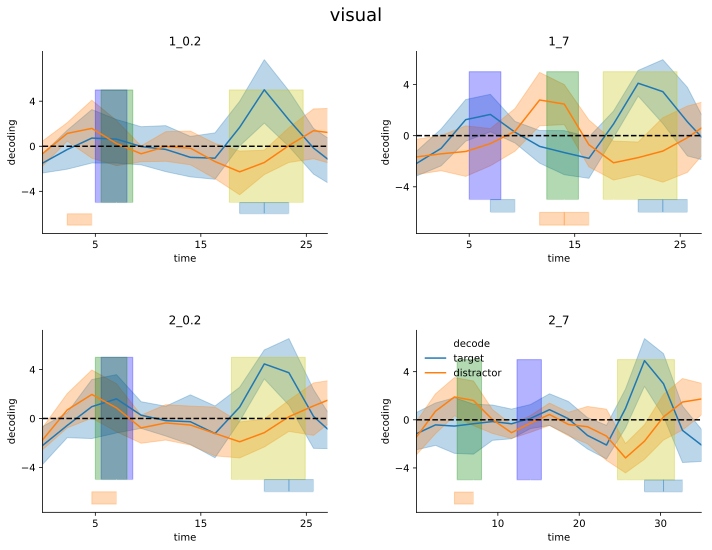

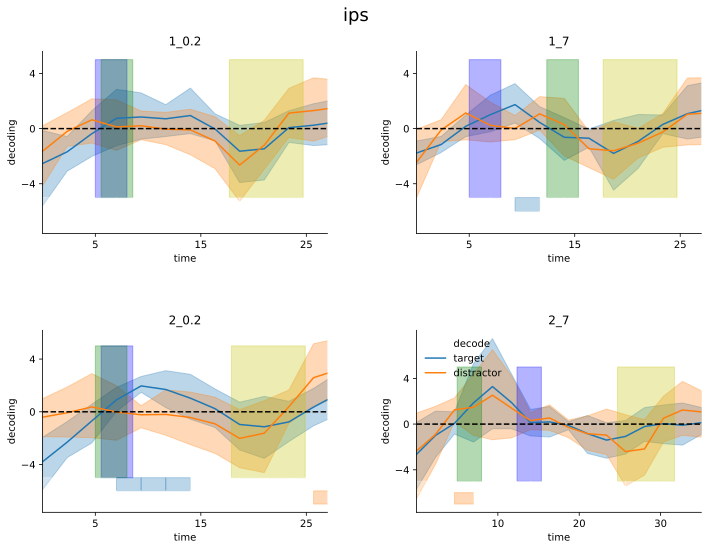

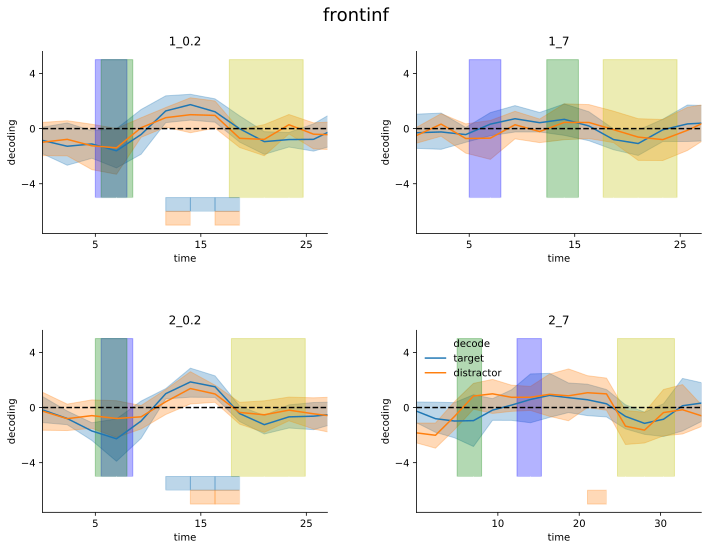

In [56]:
df_plot_tf['decode']='target'
df_plot_df['decode']='distractor'

df_tdf = pd.concat([df_plot_tf, df_plot_df])

pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:2]

for Brain_region in ['visual', 'ips', 'frontinf']:
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [0, 27]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [0, 35]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
        #ax.lines[0].set_linestyle("--")
        data_cond =  df_tdf.loc[ (df_tdf['condition']==condition) & (df_tdf['brain_reg']==Brain_region)]
        sns.lineplot( ax=ax, x="time", y="new_mean", hue='decode', hue_order =  ['target', 'distractor'], ci=None, palette=pal, data=data_cond) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='target', 'inf']) , list(data_cond.loc[data_cond['decode']=='target', 'sup']) , color=pal[0], alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='distractor', 'inf']) , list(data_cond.loc[data_cond['decode']=='distractor', 'sup']) , color=pal[1], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='response', 'inf']) , list(data_cond.loc[data_cond['decode']=='response', 'sup']) , color=pal[2], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=95, palette=pal, data=dfsn.loc[ (dfsn['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'

        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        for index_color, decode_reg in enumerate(['target', 'distractor']):
            all_timepoints = list( data_cond.loc[data_cond['decode']==decode_reg].time )
            conf_inf = list( data_cond.loc[data_cond['decode']==decode_reg].inf )
            conf_sup = list( data_cond.loc[data_cond['decode']==decode_reg].sup )
            color_sign = pal[index_color]
            y_min_shad = -5 - index_color
            y_max_shad = -6 - index_color
            line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( Brain_region, fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show

### Comparision close-far target

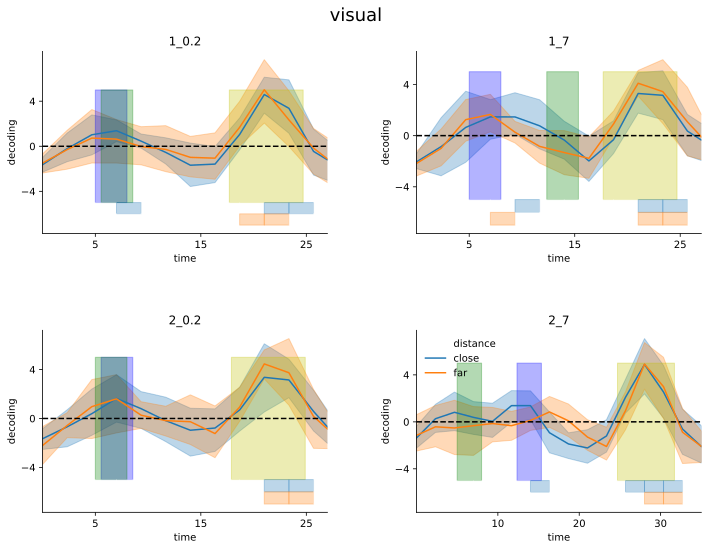

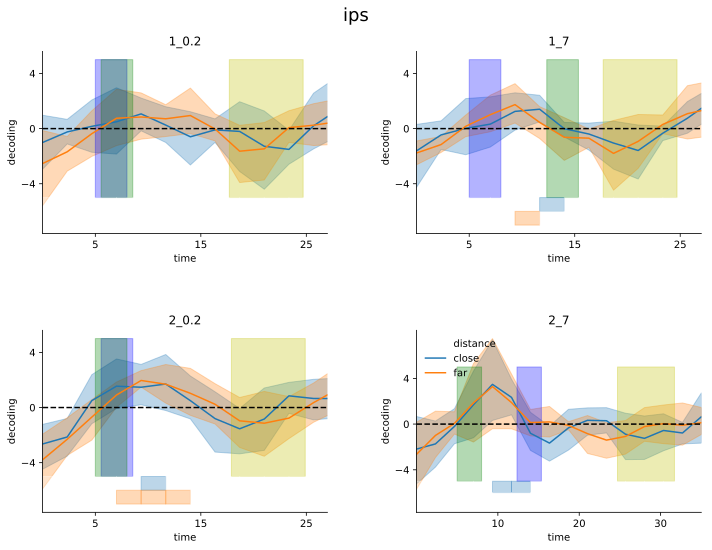

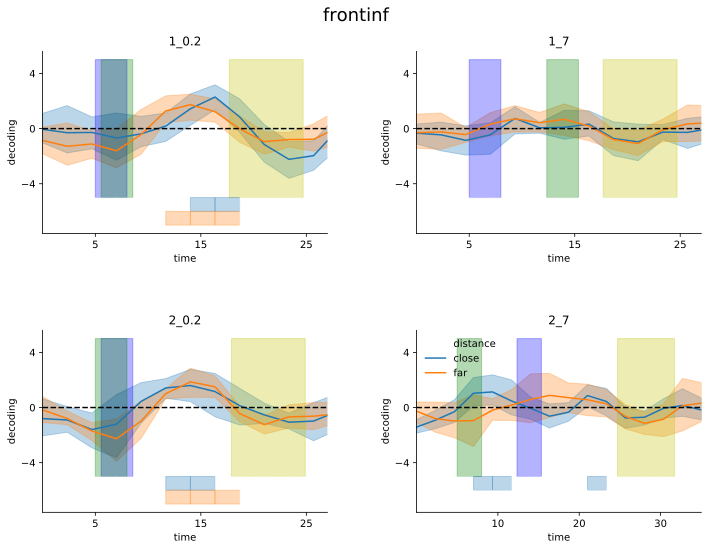

In [58]:
df_plot_tf['distance']='far'
df_plot_tc['distance']='close'

df_fc = pd.concat([df_plot_tf, df_plot_tc])

pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:2]

for Brain_region in ['visual', 'ips', 'frontinf']:
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [0, 27]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [0, 35]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
        #ax.lines[0].set_linestyle("--")
        data_cond =  df_fc.loc[ (df_fc['condition']==condition) & (df_fc['brain_reg']==Brain_region)]
        sns.lineplot( ax=ax, x="time", y="new_mean", hue='distance', hue_order =  ['close', 'far'], ci=None, palette=pal, data=data_cond) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['distance']=='close', 'inf']) , list(data_cond.loc[data_cond['distance']=='close', 'sup']) , color=pal[0], alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['distance']=='far', 'inf']) , list(data_cond.loc[data_cond['distance']=='far', 'sup']) , color=pal[1], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='response', 'inf']) , list(data_cond.loc[data_cond['decode']=='response', 'sup']) , color=pal[2], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=95, palette=pal, data=dfsn.loc[ (dfsn['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'

        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        for index_color, decode_reg in enumerate(['close', 'far']):
            all_timepoints = list( data_cond.loc[data_cond['distance']==decode_reg].time )
            conf_inf = list( data_cond.loc[data_cond['distance']==decode_reg].inf )
            conf_sup = list( data_cond.loc[data_cond['distance']==decode_reg].sup )
            color_sign = pal[index_color]
            y_min_shad = -5 - index_color
            y_max_shad = -6 - index_color
            line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( Brain_region, fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show

### Comparison close-far distractor

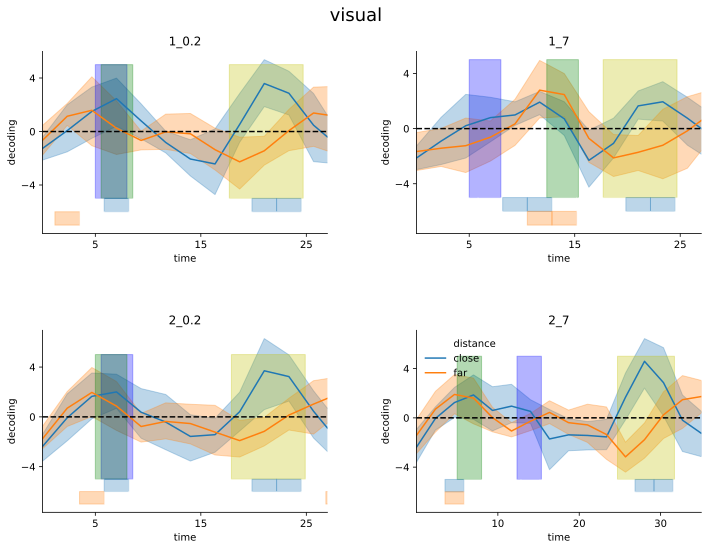

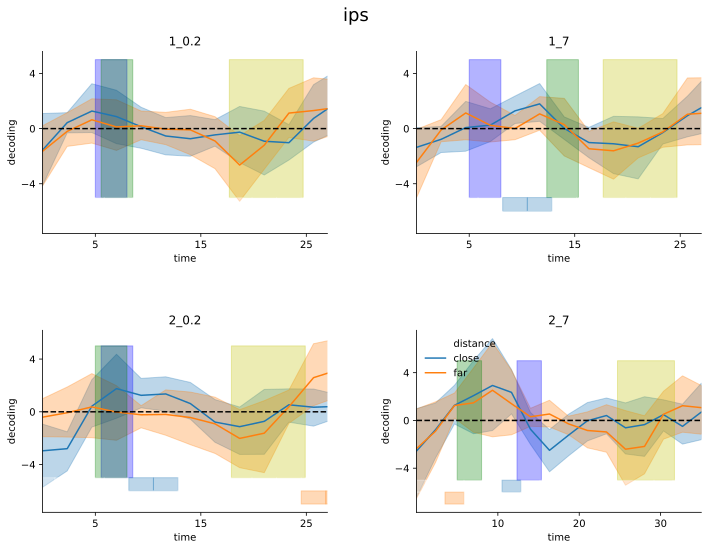

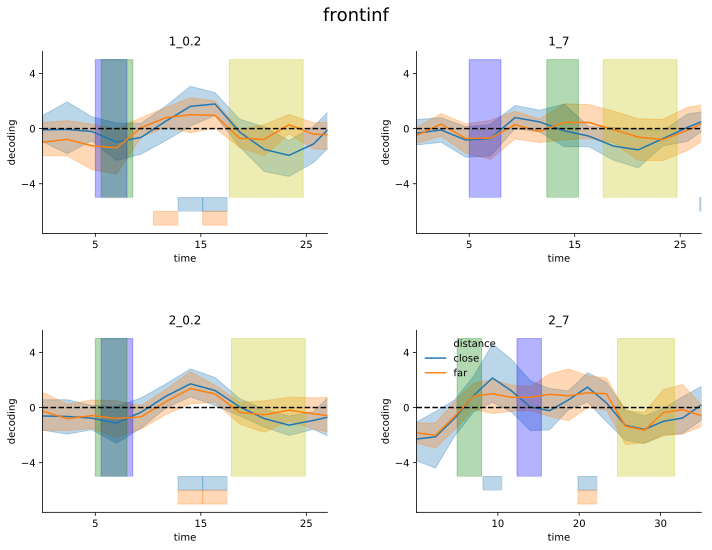

In [65]:
df_plot_df['distance']='far'
df_plot_dc['distance']='close'

df_fc = pd.concat([df_plot_df, df_plot_dc])

pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:2]

for Brain_region in ['visual', 'ips', 'frontinf']:
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [0, 27]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [0, 35]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
        #ax.lines[0].set_linestyle("--")
        data_cond =  df_fc.loc[ (df_fc['condition']==condition) & (df_fc['brain_reg']==Brain_region)]
        sns.lineplot( ax=ax, x="time", y="new_mean", hue='distance', hue_order =  ['close', 'far'], ci=None, palette=pal, data=data_cond) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['distance']=='close', 'inf']) , list(data_cond.loc[data_cond['distance']=='close', 'sup']) , color=pal[0], alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['distance']=='far', 'inf']) , list(data_cond.loc[data_cond['distance']=='far', 'sup']) , color=pal[1], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='response', 'inf']) , list(data_cond.loc[data_cond['decode']=='response', 'sup']) , color=pal[2], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=95, palette=pal, data=dfsn.loc[ (dfsn['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'

        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        for index_color, decode_reg in enumerate(['close', 'far']):
            all_timepoints = list( data_cond.loc[data_cond['distance']==decode_reg].time )
            conf_inf = list( data_cond.loc[data_cond['distance']==decode_reg].inf )
            conf_sup = list( data_cond.loc[data_cond['distance']==decode_reg].sup )
            color_sign = pal[index_color]
            y_min_shad = -5 - index_color
            y_max_shad = -6 - index_color
            line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( Brain_region, fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show